In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("KNNAlgorithmDataset.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
X = df[df.columns[2:-1]]
y = df['diagnosis']
X_data,y_data = X.values,y.values

In [4]:
for i in range(0,len(y)):
    if y[i] == 'M':
        y[i] = 1
    else:
        y[i] = 0

<ipython-input-4-768e4ba24ea5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1
<ipython-input-4-768e4ba24ea5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 0


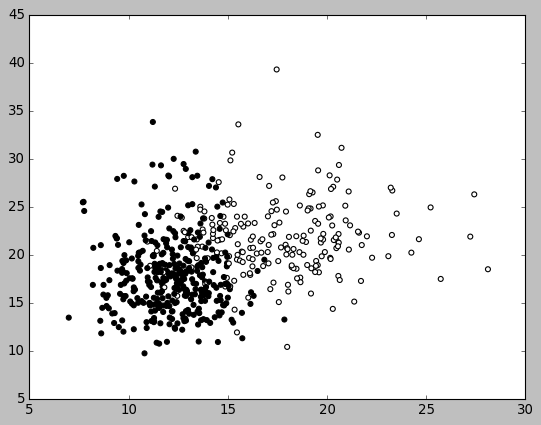

In [14]:
plt.style.available
plt.style.use("grayscale")
plt.scatter(X_data[:,0],X_data[:,1],c = y_data.reshape(-1))

In [6]:
class kNN_classifier:
    
    def __init__(self,k=5):
        self.k = k
        
    def fit(self,X,y):
        self.X = X
        self.y = y
        
    def distance_formula(self,p1,p2):
        s = 0
        for i in range(len(p1)):
            s += (p1[i]-p2[i])**2
        return s**0.5
    
    def predict(self,p):
        
        distances = [] # list of tuples ,where 0th index will have distance of i and 1th index will have o
        
        for i in range(len(self.X)):
            distances.append((self.distance_formula(self.X[i],p),i))
        distances = sorted(distances,key = lambda x : x[0])
        top_k_votes_distances = distances[:self.k]
        classes = []
        
        for dist,i in top_k_votes_distances:
            classes.append(y[i])
            
        class_,counts = np.unique(classes,return_counts=True)
        ix = np.argmax(counts)
        pred = {"class":class_[ix],"prob":np.max(counts)/np.sum(counts)}
        
        return pred

In [7]:
knn_model = kNN_classifier()
knn_model.fit(X_data,y_data)
knn_model.predict(X_data[3])

{'class': 0, 'prob': 0.8}

In [8]:
X_train,y_train = X_data[:-40],y_data[:-40]
X_test,y_test = X_data[-40:],y_data[-40:] 
knn_model = kNN_classifier()
knn_model.fit(X_train,y_train)
knn_model.predict(X_test[1])

{'class': 0, 'prob': 1.0}

In [9]:
predictions = []
for i in range(len(X_test)):
    predictions.append(knn_model.predict(X_test[i])["class"])
np.mean(predictions == y_test)

0.95